In [4]:
import numpy as np
import pandas as pd
import os
import random
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
register_matplotlib_converters()

from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


from statsmodels.tsa.vector_ar.var_model import VAR

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Get Data

In [5]:
df = pd.read_csv("dataframe.csv")
df.time = pd.to_datetime(df.time, dayfirst = True)
time = df['time'].values

df['time'] = pd.to_datetime(df.time , format = '%d/%m/%Y %H.%M.%S')
df.set_index('time',inplace=True)
points_per_day = 288 

df.tail()

,temperature,humidity,pressure,people
time,,,,
2020-07-16 11:40:00+00:00,28.60,46.5,1017.375,1.0
2020-07-16 11:45:00+00:00,28.65,46.1,1017.375,1.0
2020-07-16 11:50:00+00:00,28.65,46.1,1017.375,1.0
2020-07-16 11:55:00+00:00,28.70,45.8,1017.375,1.0
2020-07-16 12:00:00+00:00,28.70,45.8,1017.375,1.0


In [6]:
# divide in train e test
size = len(df)- (points_per_day*2)
# size = int(len(df)*0.9)
df_train, df_test = df.iloc[:size], df.iloc[size:]
len(df_test)

576

In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    print(len(X) - time_steps)
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 288

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(df_train, df_train.temperature, time_steps)
print(X_train.shape, y_train.shape)

X_test, y_test = create_dataset(df_test, df_test.temperature, time_steps)
print(X_test.shape, y_test.shape)

1727
(1727, 288, 4) (1727,)
288
(288, 288, 4) (288,)


In [9]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=288,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/10
98/98 [==============================] - 29s 291ms/step - loss: 655.3621 - val_loss: 340.1933
Epoch 2/10
98/98 [==============================] - 28s 285ms/step - loss: 329.9468 - val_loss: 139.1314
Epoch 3/10
98/98 [==============================] - 29s 296ms/step - loss: 148.9087 - val_loss: 42.0800
Epoch 4/10
98/98 [==============================] - 30s 307ms/step - loss: 58.1594 - val_loss: 7.0026
Epoch 5/10
98/98 [==============================] - 29s 293ms/step - loss: 20.1090 - val_loss: 1.0350
Epoch 6/10
98/98 [==============================] - 31s 315ms/step - loss: 7.2924 - val_loss: 3.3978
Epoch 7/10
98/98 [==============================] - 29s 297ms/step - loss: 3.5962 - val_loss: 6.5799
Epoch 8/10
98/98 [==============================] - 30s 311ms/step - loss: 2.7147 - val_loss: 8.3699
Epoch 9/10
98/98 [==============================] - 31s 317ms/step - loss: 2.5416 - val_loss: 9.2308
Epoch 10/10
98/98 [==============================] - 30s 309ms/step - loss: 2.

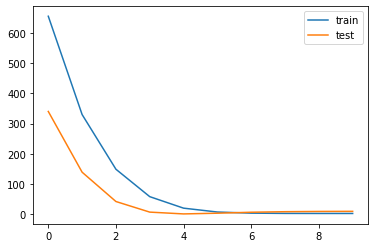

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [12]:
y_pred = model.predict(X_test)

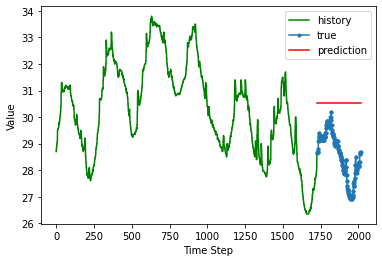

In [13]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();